<a href="https://colab.research.google.com/github/devovevo/cs4220/blob/main/CS_4220_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/devovevo/cs4220.git

Cloning into 'cs4220'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 40 (delta 1), reused 2 (delta 0), pack-reused 28
Receiving objects: 100% (40/40), 45.40 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.genfromtxt("cs4220/GN.txt", delimiter=",")
print(data.shape)
print(data)

(1000, 2)
[[0.00000000e+00 4.21357261e+00]
 [2.00200200e-03 4.28895978e+00]
 [4.00400400e-03 3.89894431e+00]
 ...
 [1.99599600e+00 2.61649462e-01]
 [1.99799800e+00 4.76662650e-01]
 [2.00000000e+00 2.30835108e-01]]


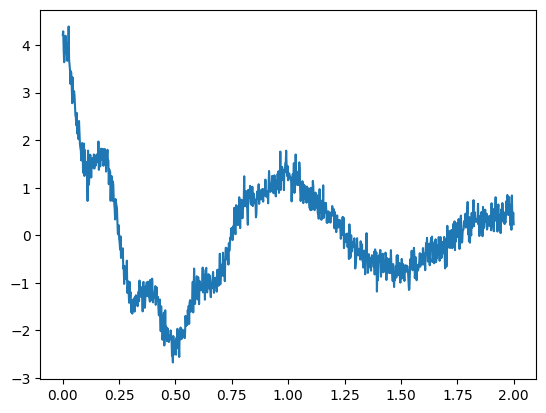

In [8]:
plt.plot(data[:, 0], data[:, 1])

In [9]:
def model(x, theta):
  return theta[0] * np.exp(theta[1] * x) * np.cos(2 * np.pi * x) + np.exp(theta[2] * x) * np.cos(10 * np.pi * x)

In [10]:
def model_grad(x, theta):
  return np.array([
      np.exp(theta[1] * x) * np.cos(2 * np.pi * x),
      theta[0] * x * np.exp(theta[1] * x) * np.cos(2 * np.pi * x),
      x * np.exp(theta[2] * x) * np.cos(10 * np.pi * x)
    ]).T

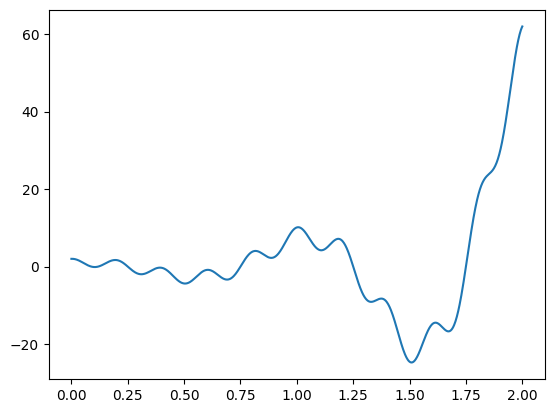

In [11]:
init_guess = model(data[:, 0], np.array([1, 2, 1]))
plt.plot(data[:, 0], init_guess)

In [12]:
init_grad = model_grad(data[:, 0], np.array([0, 5, 1]))
print(init_grad.shape)
print(init_grad)

(1000, 3)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00998037e+00 0.00000000e+00 2.00204769e-03]
 [1.01989892e+00 0.00000000e+00 3.98830534e-03]
 ...
 [2.15830483e+04 0.00000000e+00 1.45735278e+01]
 [2.18053553e+04 0.00000000e+00 1.47046607e+01]
 [2.20264658e+04 0.00000000e+00 1.47781122e+01]]


In [24]:
def gauss_newton(theta0, data, labels, max_iter=500, tol=1e-10, return_all=False):
  if return_all:
    theta_list = [theta0]
    p_list = []

  theta = theta0

  for k in range(max_iter):
    cur_preds = model(data, theta)
    cur_grad = model_grad(data, theta)

    lstsq_result = np.linalg.lstsq(cur_grad, labels - cur_preds, rcond=None)
    p = lstsq_result[0].reshape(3, 1)

    if return_all:
      p_list.append(p)

    if np.linalg.norm(p) < tol:
      break

    theta = theta + lstsq_result[0].reshape(3, 1)

    if return_all:
      theta_list.append(theta)

  if return_all:
    return theta_list, p_list
  else:
    return theta

Initial Parameter Guess: [[0.81156312]
 [1.44799679]
 [1.20848796]]
Final Parameter Guess: [[ 3.14671086]
 [-0.98868301]
 [-1.90325191]]
Final Search Direction: [[-4.80157770e-15]
 [ 8.55369815e-16]
 [-8.10228309e-13]]
Final Search Direction Norm: 8.10242987686617e-13
Plot of Norm of Search Direction || p ||_2 vs Iteration:


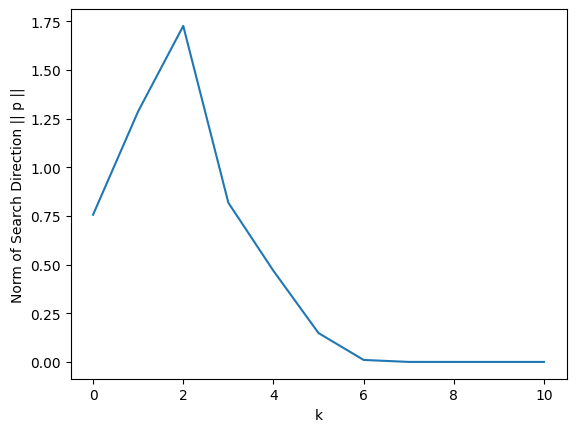

Plot of Data Points and Model Fit:


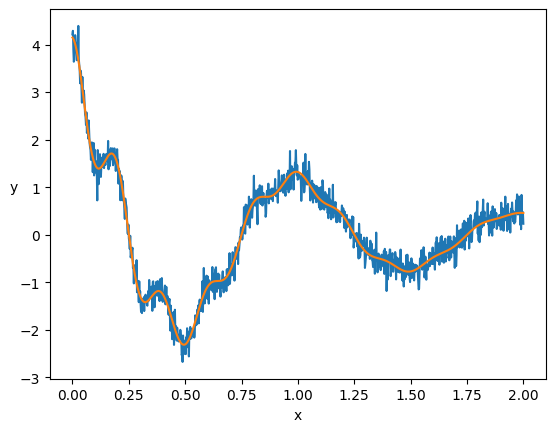

In [26]:
theta0 = np.random.uniform(low=0.5,high=1.5,size=(3,1))
print("Initial Parameter Guess:", theta0)

theta_list, p_list = gauss_newton(theta0, data[:, 0], data[:, 1], return_all=True)
print("Final Parameter Guess:", theta_list[-1])
print("Final Search Direction:", p_list[-1])
print("Final Search Direction Norm:", np.linalg.norm(p_list[-1]))

p_list_norms = [np.linalg.norm(p) for p in p_list]

print("Plot of Norm of Search Direction || p ||_2 vs Iteration:")
plt.plot(p_list_norms)
plt.xlabel("k")
plt.ylabel("Norm of Search Direction || p ||")
plt.show()

preds = model(data[:, 0], theta_list[-1])

print("Plot of Data Points and Model Fit:")
plt.plot(data[:, 0], data[:, 1], label="Original Data")
plt.plot(data[:, 0], preds, label="Predictions")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()